In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.decomposition import PCA

# DATA PREPROCESSING

In [3]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data',index_col='ID#')
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.shape

(3999, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [6]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
# missing values
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

# EDA & Visualization

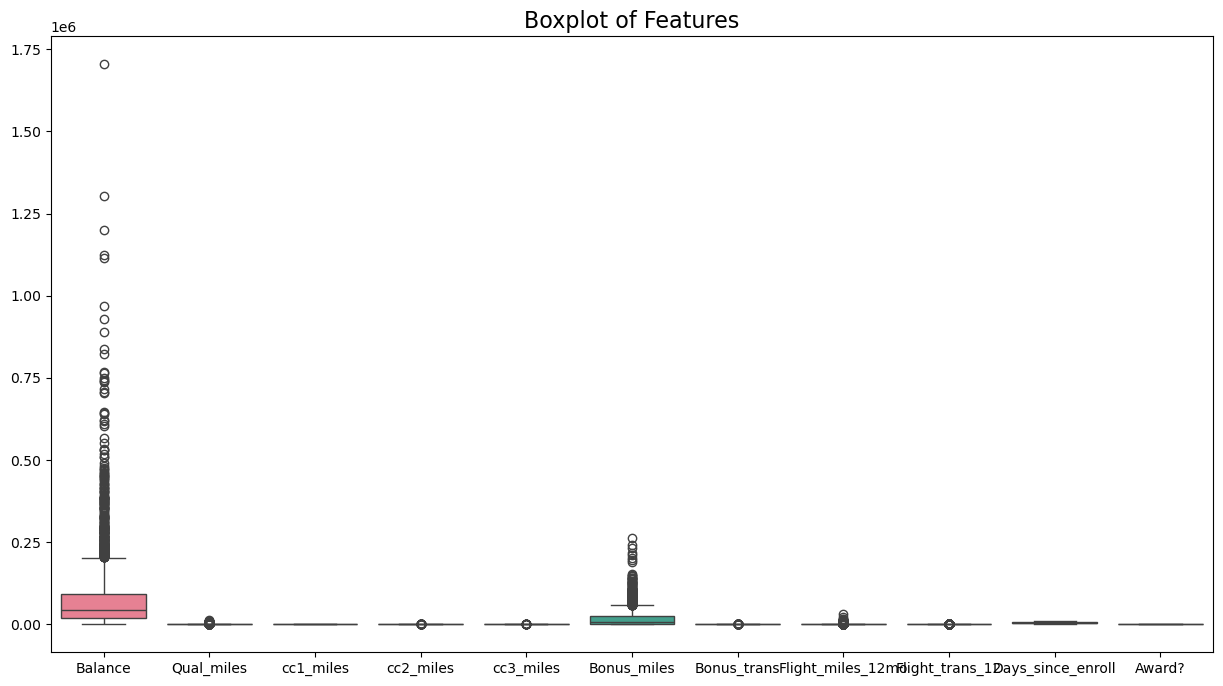

In [12]:
# Boxplots to detect outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Boxplot of Features", fontsize=16)
plt.show()

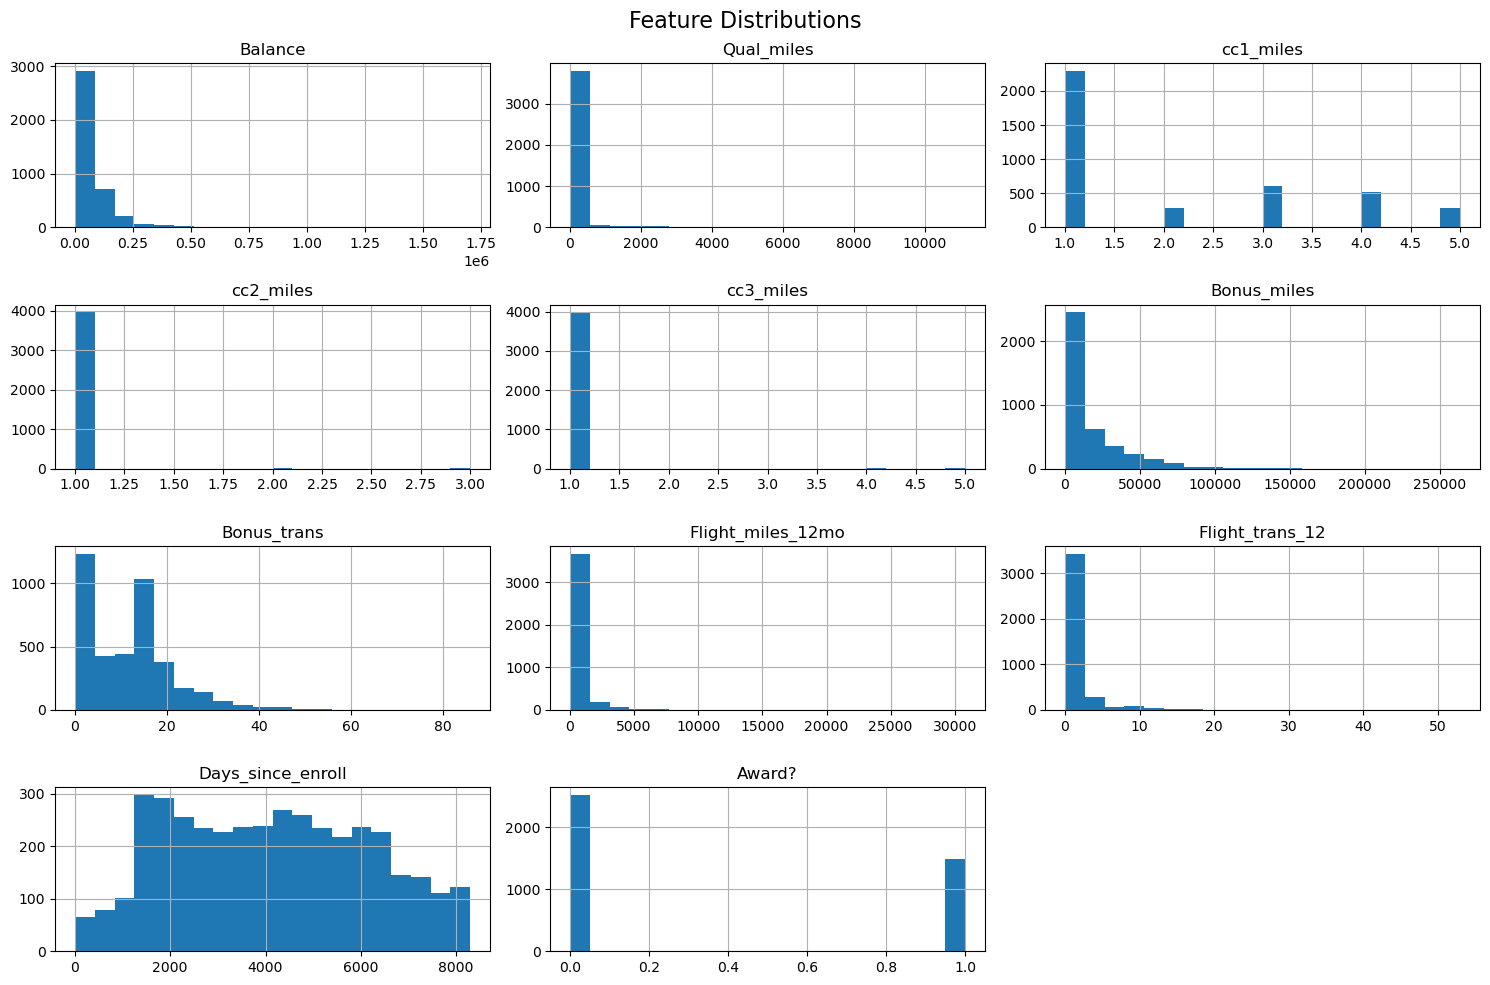

In [13]:
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


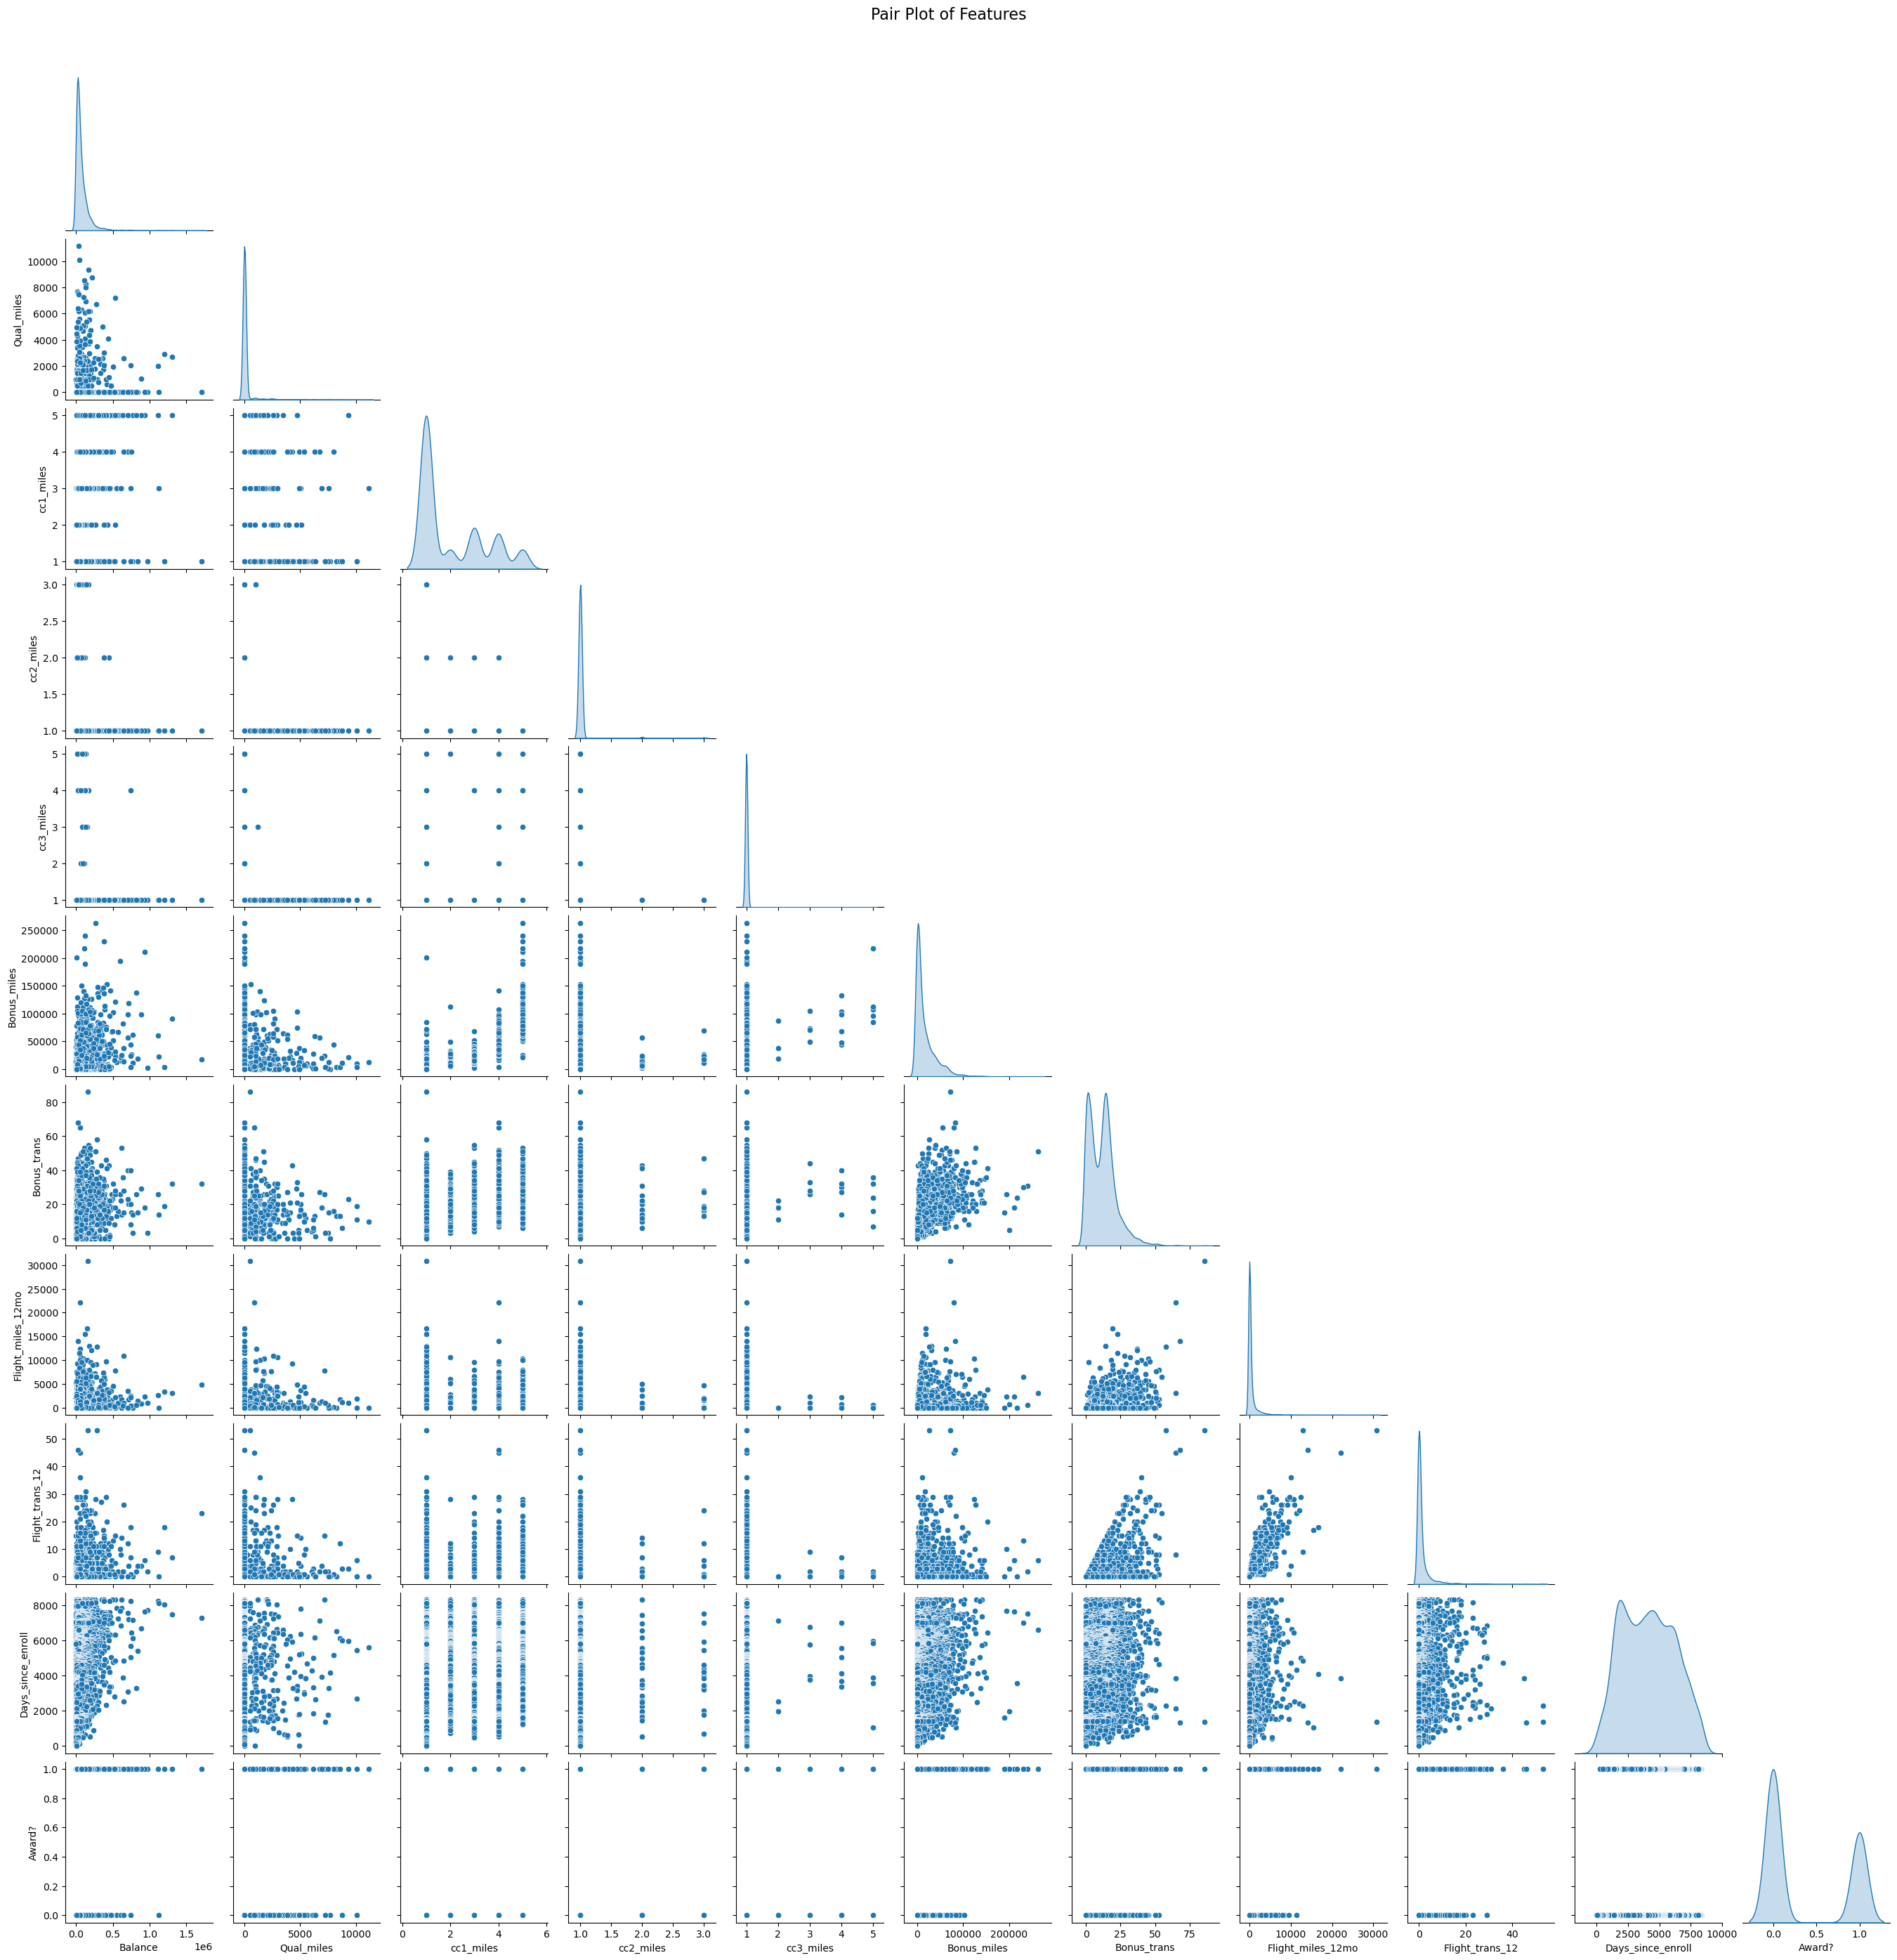

In [14]:
sns.pairplot(df, diag_kind="kde", corner=True)
plt.suptitle("Pair Plot of Features", y=1.02, fontsize=16)
plt.show()

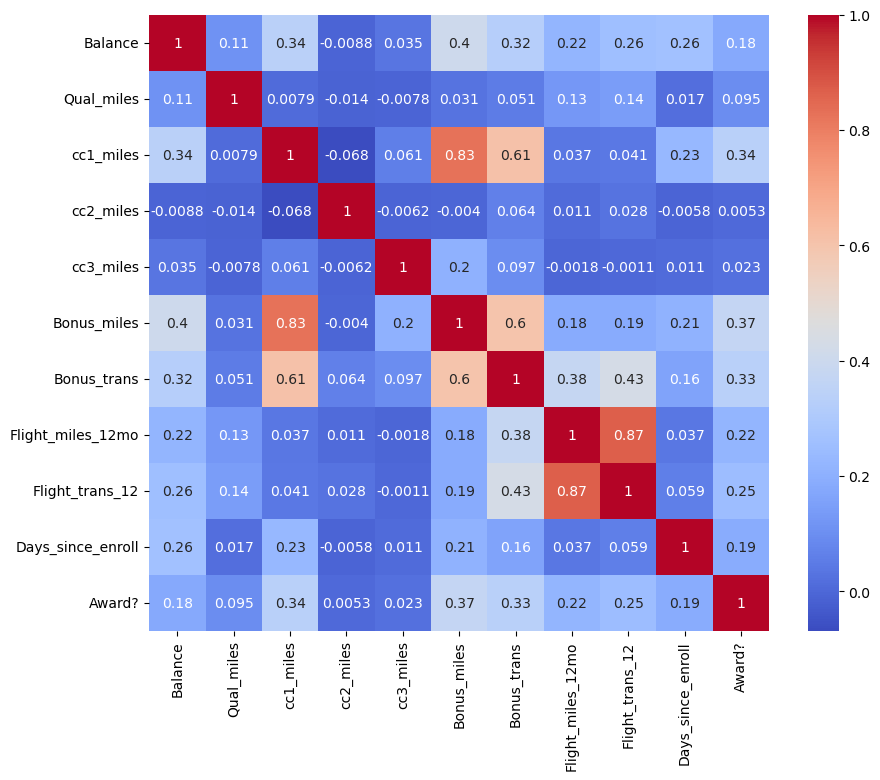

In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [23]:
# boxplot showing outliers in few columns to remove them lets define a function.

In [24]:
# capping function  to remove outliers.
def capping(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [25]:
capping(df,df.columns)

<Axes: >

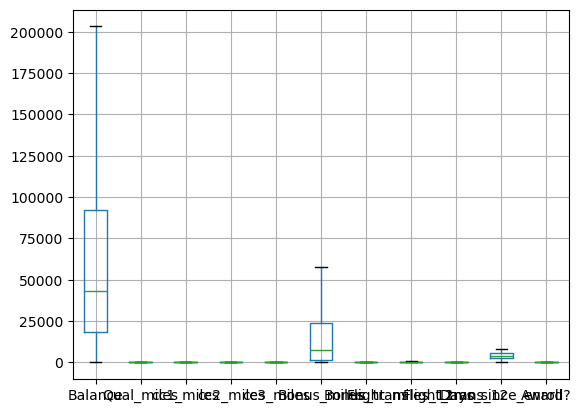

In [27]:
df.boxplot() # as we can see there are no outliers now.

In [28]:
# Scale features for clustering

In [29]:
scaler=StandardScaler()

In [30]:
scaled_df=scaler.fit_transform(df)
scaled_df

array([[-0.60725829,  0.        , -0.76957841, ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-0.75894657,  0.        , -0.76957841, ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-0.38206963,  0.        , -0.76957841, ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 0.1675298 ,  0.        ,  0.68312117, ..., -0.62614341,
        -1.31560393,  1.30391816],
       [-0.15118775,  0.        , -0.76957841, ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [-1.03556163,  0.        , -0.76957841, ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

In [31]:
# Using Minmaxscaler for accuracy result comparison.
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(3999, 11)

In [33]:
df1=pd.DataFrame(scaled_df,columns=df.columns)
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.607258,0.0,-0.769578,0.0,0.0,-0.843091,-1.148854,-0.604313,-0.626143,1.395454,-0.766919
1,-0.758947,0.0,-0.769578,0.0,0.0,-0.840822,-1.039133,-0.604313,-0.626143,1.379957,-0.766919
2,-0.382070,0.0,-0.769578,0.0,0.0,-0.624581,-0.819689,-0.604313,-0.626143,1.411920,-0.766919
3,-0.835106,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,-0.604313,-0.626143,1.372208,-0.766919
4,0.579265,0.0,1.409471,0.0,0.0,1.543191,1.594189,2.034489,2.020176,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.772038,0.0,-0.769578,0.0,0.0,-0.381007,-0.819689,0.074478,0.432384,-1.315120,1.303918
3995,0.010506,0.0,-0.769578,0.0,0.0,-0.798437,-0.709967,-0.604313,-0.626143,-1.318994,1.303918
3996,0.167530,0.0,0.683121,0.0,0.0,0.555335,-0.380802,-0.604313,-0.626143,-1.315604,1.303918
3997,-0.151188,0.0,-0.769578,0.0,0.0,-0.825052,-1.148854,1.092666,0.432384,-1.316088,-0.766919


# K-Means CLustering

In [35]:
# Elbow Method
inertia=[]
K= range(1,11)
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

In [36]:
inertia

[31992.000000000004,
 22258.774283802224,
 17745.901397315218,
 16222.66669431704,
 13705.295394747083,
 13203.696537718759,
 12001.823530249781,
 10904.84399575939,
 10216.582011611332,
 9593.517757445157]

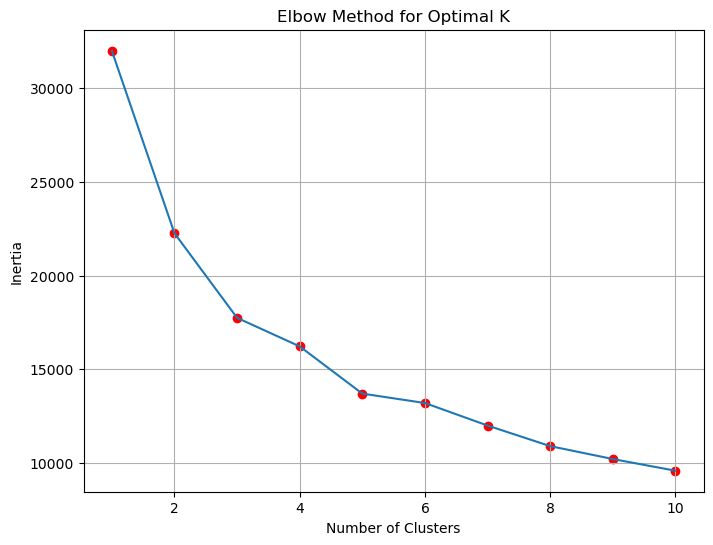

In [37]:
# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia)
plt.scatter(K,inertia,color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

In [38]:
# Apply K-Means with optimal K (e.g., 4 based on the Elbow Curve)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k)
kmeans_labels = kmeans.fit_predict(scaled_df)

In [39]:
kmeans_labels

array([0, 0, 0, ..., 1, 0, 0])

In [40]:
# Evaluate using Silhouette Score for optimal k = 4.
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
kmeans_silhouette

0.3071700047862651

In [41]:
# lets experiment with diffrent optimal k values to get silhoutte scores.

In [42]:
# Elbow method for optimal K
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    
    # Compute silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_df, labels)
    silhouette_scores.append(silhouette_avg)

In [43]:
silhouette_avg

0.2509476746559255

In [44]:
silhouette_scores

[0.31821669618040627,
 0.309416629023312,
 0.307123045013532,
 0.22800170994790248,
 0.2850768303409895,
 0.23612849305938727,
 0.24764530256442438,
 0.2526441349447826,
 0.2509476746559255]

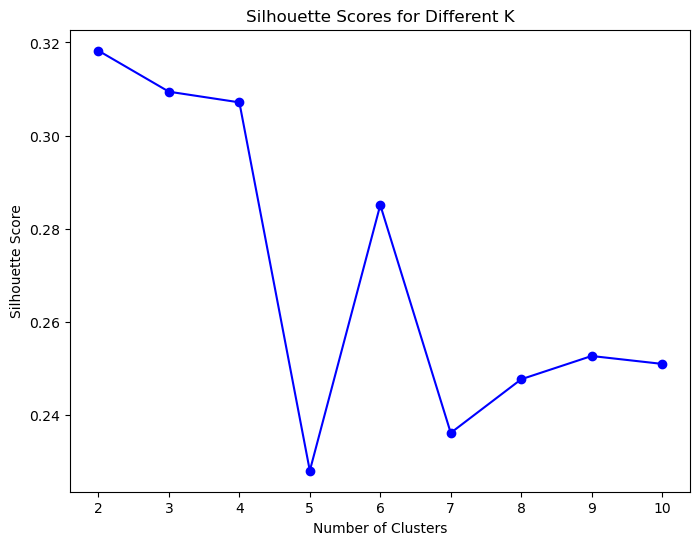

In [45]:
# Plot silhouette scores for different K
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K')
plt.show()


# Hierarchical Clustering

In [47]:
# Generate linkage matrix
linkage_matrix = linkage(scaled_df, method='ward')

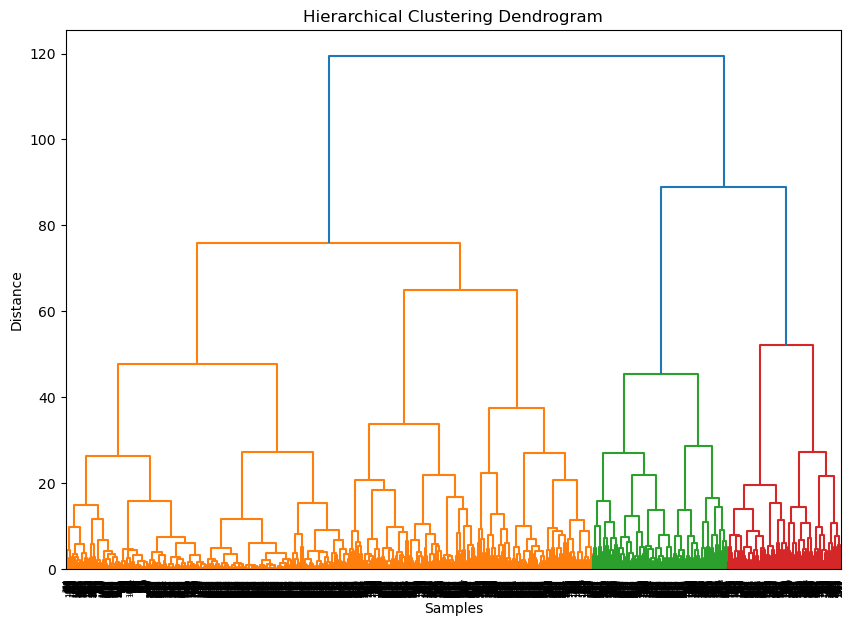

In [48]:
# Plot Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [49]:
# Cut the dendrogram at a specific level to form clusters
hierarchical_labels = fcluster(linkage_matrix, t=4, criterion='maxclust')
hierarchical_labels

array([1, 1, 1, ..., 2, 3, 1], dtype=int32)

In [50]:
# Evaluate with Silhouette Score
hierarchical_silhouette = silhouette_score(scaled_df, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}")

Hierarchical Clustering Silhouette Score: 0.20256214455852284


In [51]:
# 1. Experimenting with Hierarchical Clustering
# The key parameter to experiment with is the linkage criterion. Common options are:

# single: Minimum distance between points of two clusters.
# complete: Maximum distance between points of two clusters.
# average: Average distance between points of two clusters.
# ward: Minimizes the variance of clusters (default for hierarchical clustering).

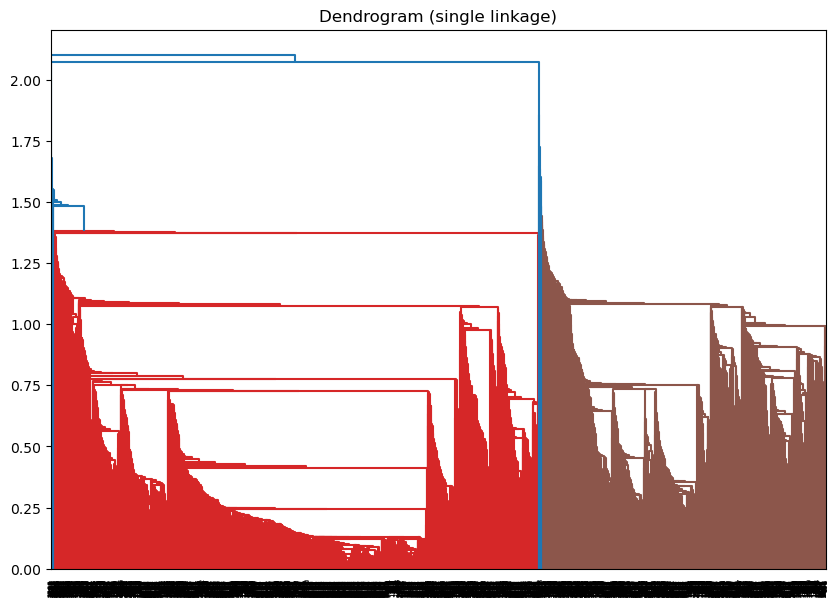

Single linkage silhouette score: 0.18551233774755127


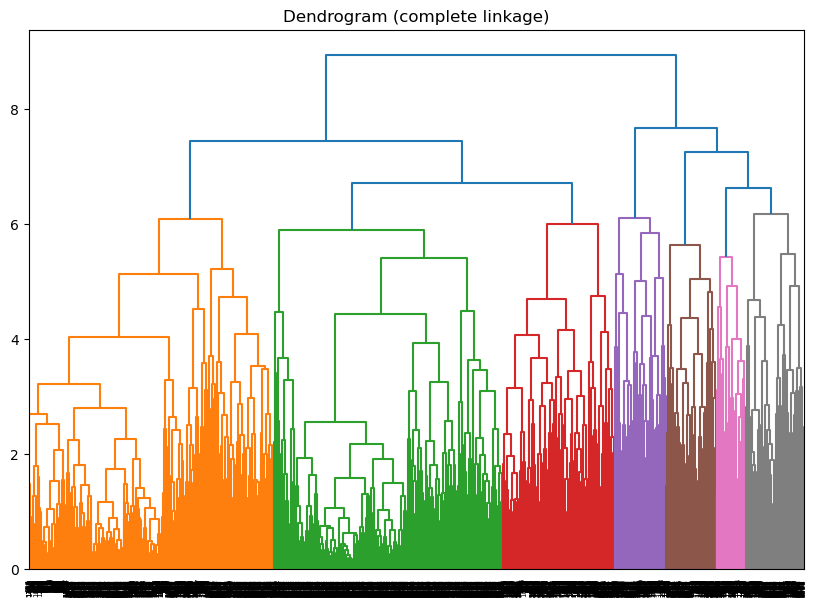

Complete linkage silhouette score: 0.11434909086963348


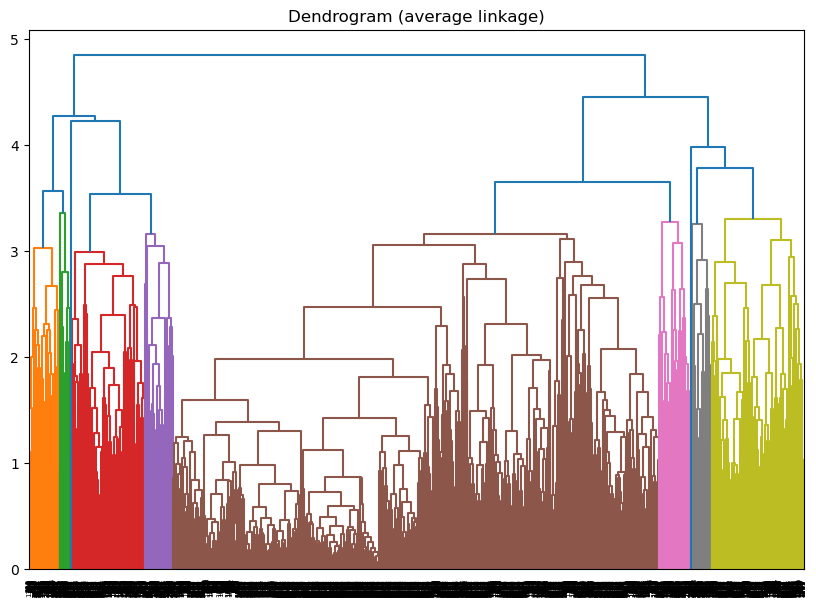

Average linkage silhouette score: 0.2902125095820589


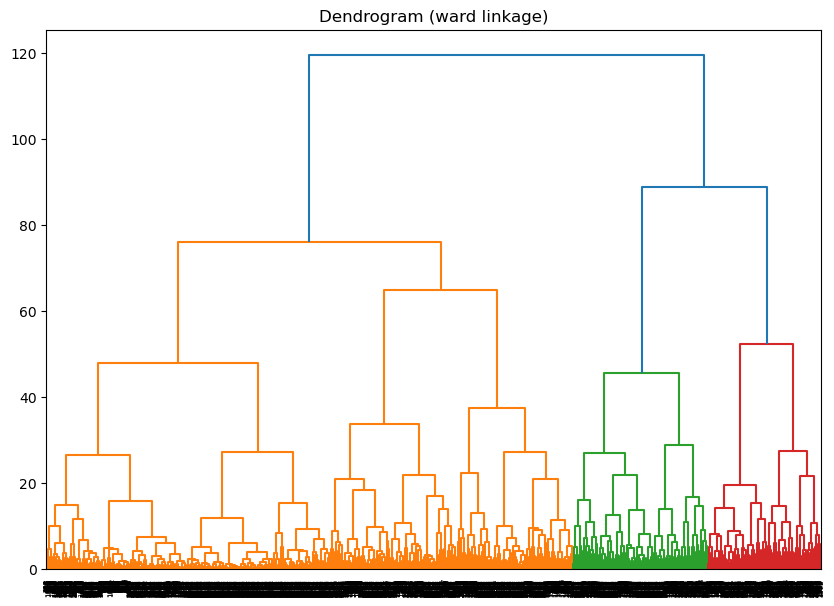

Ward linkage silhouette score: 0.20256214455852284


In [52]:
# Experiment with different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']
for method in linkage_methods:
    # Generate linkage matrix
    linkage_matrix = linkage(scaled_df, method=method)
    
    # Plot dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram ({method} linkage)')
    plt.show()

    # Cut dendrogram at a fixed number of clusters
    clusters = fcluster(linkage_matrix, t=4, criterion='maxclust')
    
    # Evaluate with silhouette score
    silhouette_avg = silhouette_score(scaled_df, clusters)
    print(f"{method.capitalize()} linkage silhouette score: {silhouette_avg}")


# DBSCAN

In [54]:
# Apply DBSCAN

In [55]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [57]:
dbscan_labels = dbscan.fit_predict(scaled_df)
dbscan_labels

array([ 0,  0,  0, ..., -1, 30,  0], dtype=int64)

In [62]:
# Evaluate using Silhouette Score (ignoring noise points with label -1)
if len(set(dbscan_labels)) > 1:  # Silhouette score requires at least 2 clusters
    dbscan_silhouette = silhouette_score(scaled_df[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN could not form clusters with the current parameters.")

DBSCAN Silhouette Score: 0.11862726845782659


In [71]:
# Experimenting with DBSCAN
# The two main parameters to experiment with are:

# 1. eps: Maximum distance between two samples for them to be considered as neighbors.
# 2. min_samples: Minimum number of points required to form a dense region (cluster).

In [76]:
# K-distance plot for determining optimal epsilon
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(scaled_df)
distances, indices = nearest_neighbors.kneighbors(scaled_df)

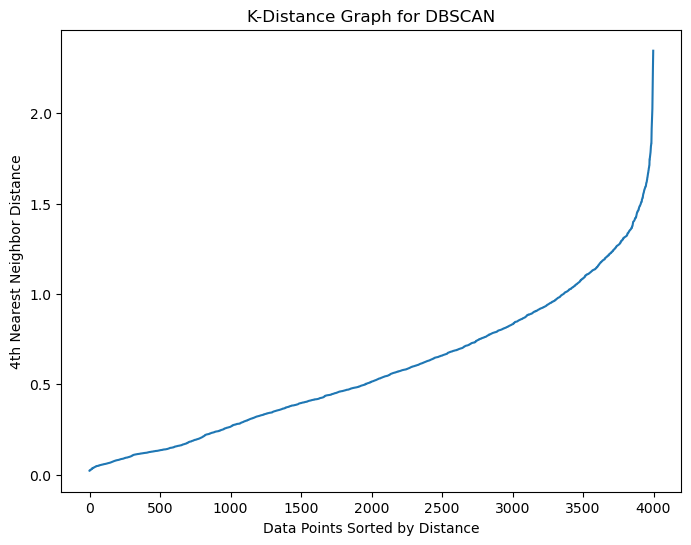

In [78]:
# Sort distances for plotting
distances = np.sort(distances[:, 4])  # 4th nearest neighbor distance
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("K-Distance Graph for DBSCAN")
plt.show()


In [79]:
# Experiment with different eps and min_samples
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_df)
        
        # Check number of clusters
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(f"DBSCAN with eps={eps}, min_samples={min_samples}: {num_clusters} clusters")
        
        # Compute silhouette score (ignore noise points)
        if num_clusters > 1:
            silhouette_avg = silhouette_score(scaled_df[labels != -1], labels[labels != -1])
            print(f"Silhouette Score: {silhouette_avg}")


DBSCAN with eps=0.3, min_samples=3: 96 clusters
Silhouette Score: -0.1115352255759046
DBSCAN with eps=0.3, min_samples=5: 22 clusters
Silhouette Score: -0.14278557706712333
DBSCAN with eps=0.3, min_samples=10: 3 clusters
Silhouette Score: 0.1523124842212841
DBSCAN with eps=0.5, min_samples=3: 96 clusters
Silhouette Score: 0.00402466512840552
DBSCAN with eps=0.5, min_samples=5: 33 clusters
Silhouette Score: 0.11862726845782659
DBSCAN with eps=0.5, min_samples=10: 11 clusters
Silhouette Score: 0.014765781897802551
DBSCAN with eps=0.7, min_samples=3: 78 clusters
Silhouette Score: 0.022877481298824498
DBSCAN with eps=0.7, min_samples=5: 40 clusters
Silhouette Score: 0.10745088149072766
DBSCAN with eps=0.7, min_samples=10: 16 clusters
Silhouette Score: 0.17221756976386057


# Steps for Evaluation and Comparison


In [86]:
# Apply PCA
pca = PCA(n_components=2)

In [87]:
reduced_data = pca.fit_transform(scaled_df)

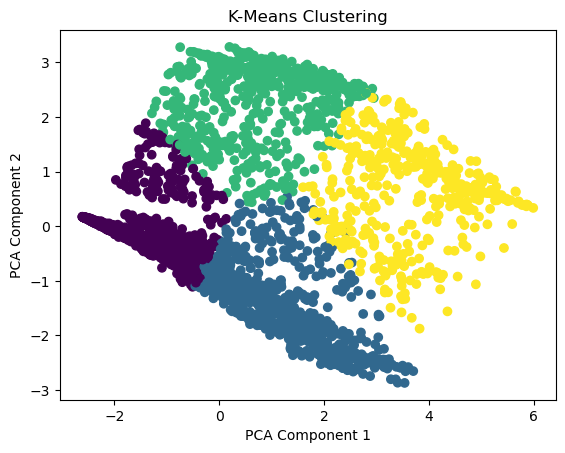

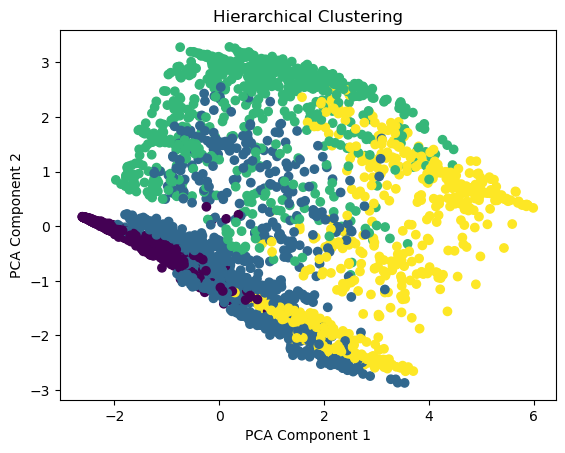

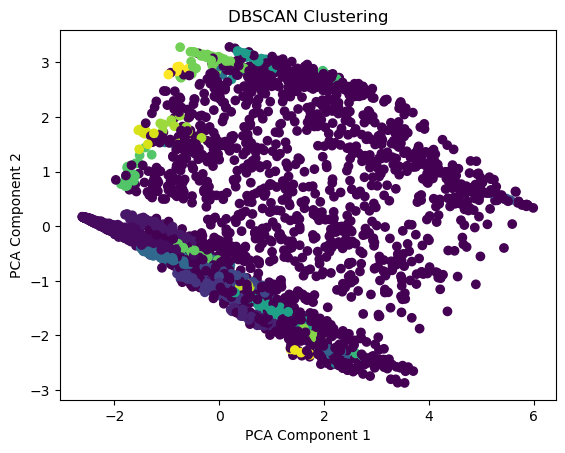

In [88]:
# PCA for 2D Visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

# Plot K-Means Clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Plot Hierarchical Clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Plot DBSCAN Clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



# Analysis and Interpretation

### Add Cluster Labels to the Dataset: Append the generated cluster labels to your original dataset for each algorithm.

In [91]:
# concate lables with the main dataset
df['KMeans_Cluster'] = kmeans_labels
df['Hierarchical_Cluster'] = hierarchical_labels
df['DBSCAN_Cluster'] = dbscan_labels

In [92]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
ID#,,,,,,,,,,,,,,
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0,1,0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,0,1,0
3,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,0,1,0
4,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,0,1,0
5,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,777.5,2.5,6935.0,1.0,3,4,-1


### Analyze Each Cluster: Group the dataset by cluster labels and compute summary statistics (mean, median, etc.) for each feature to identify cluster characteristics.


In [94]:
# Analyze K-Means Clusters
kmeans_analysis = df.groupby('KMeans_Cluster').mean()
print("K-Means Cluster Analysis:\n", kmeans_analysis)

K-Means Cluster Analysis:
                       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                               
0                32763.443277         0.0   1.129727        1.0        1.0   
1                88671.965349         0.0   3.457674        1.0        1.0   
2                76172.614297         0.0   1.218094        1.0        1.0   
3               125077.225686         0.0   4.024938        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0                3422.019433     5.965861          14.999475         0.074580   
1               30268.978605    16.749767          25.310698         0.112558   
2                7725.065024    10.516963         646.446688         2.088853   
3               44366.632793    24.927681         638.718204         2.018703   

                D

In [95]:
# Analyze Hierarchical Clusters
hierarchical_analysis = df.groupby('Hierarchical_Cluster').mean()
print("Hierarchical Cluster Analysis:\n", hierarchical_analysis)

Hierarchical Cluster Analysis:
                             Balance  Qual_miles  cc1_miles  cc2_miles  \
Hierarchical_Cluster                                                    
1                      27675.953552         0.0   1.170082        1.0   
2                      79761.090040         0.0   2.423904        1.0   
3                      78522.887374         0.0   1.441894        1.0   
4                     102337.149228         0.0   4.246998        1.0   

                      cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Hierarchical_Cluster                                                            
1                           1.0   3426.640027     6.348361           0.204918   
2                           1.0  17918.174104    12.491633          55.899602   
3                           1.0   9787.424677    11.642755         609.373745   
4                           1.0  46829.789880    21.929674         371.967410   

                      Flight_trans_12  Day

In [96]:
# Analyze DBSCAN Clusters
dbscan_analysis = df[dbscan_labels != -1].groupby('DBSCAN_Cluster').mean()  # Exclude noise (-1)
print("DBSCAN Cluster Analysis:\n", dbscan_analysis)

DBSCAN Cluster Analysis:
                       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_Cluster                                                               
0                24766.411811         0.0        1.0        1.0        1.0   
1                26156.828729         0.0        1.0        1.0        1.0   
2                77173.053571         0.0        4.0        1.0        1.0   
3               132880.500000         0.0        4.0        1.0        1.0   
4                72525.639594         0.0        3.0        1.0        1.0   
5                14713.142857         0.0        2.0        1.0        1.0   
6                31227.177966         0.0        3.0        1.0        1.0   
7               203218.750000         0.0        5.0        1.0        1.0   
8                36548.526316         0.0        4.0        1.0        1.0   
9                63279.421053         0.0        5.0        1.0        1.0   
10               50529.408163         

# Insights

# ----- The End -----